# Model Creation - Naive Bayes Baseline
This notebook creates the multinomial naive bayes model that classify the abstracts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Import data

In [3]:
data = pd.read_pickle('preprocessed_abstracts.pkl')
data.iloc[0]['abstract']

'andreas ekberg  born 2 january 1985  swedish football referee  ekberg currently resides malmö  he full international referee fifa since 2013  he became professional referee 2004 allsvenskan referee since 2009  ekberg refereed 74 matches allsvenskan  55 matches superettan 14 international matches 2014 '

Divide into training and test data. 80% train 20% test.

In [4]:
x = data['abstract']
y = data['label']
classes = y.unique()
classes.sort()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=1)

Create a pipeline of constructing a count matrix, followed by a tf-idf matrix, and finally the model.

In [5]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [6]:
nb.fit(train_x, train_y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [7]:
predictions = nb.predict(test_x)

In [8]:
print('accuracy %s' % accuracy_score(predictions, test_y))
print(classification_report(test_y, predictions))

accuracy 0.9382245869504341
             precision    recall  f1-score   support

       Bird       0.95      0.97      0.96      2026
 Board Game       0.00      0.00      0.00       114
       Book       0.97      0.75      0.85      1112
       City       0.96      0.99      0.98      2084
    Company       0.92      0.99      0.96      1878
    Country       0.00      0.00      0.00        58
       Fish       0.99      0.98      0.99      1929
     Mammal       0.97      0.94      0.96      2004
     Person       0.76      0.97      0.85      1985
     Planet       1.00      0.92      0.96       880
      Plant       0.99      0.91      0.95      1982
 University       0.99      0.96      0.98      1212
 Video Game       0.94      0.91      0.93       591

avg / total       0.94      0.94      0.93     17855



/home/elias/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Construct a confusion matrix

In [9]:
cm = confusion_matrix(test_y, predictions)
for r in range(len(cm)):
    print("\multicolumn{1}{|c|}{} &",classes[r], end="")
    for e in range(len(cm[r])):
        print("&", end ="") 
        if r == e:
            print("\cellcolor{lightgray}", end ="") 
        print(cm[r][e], end ="") 
    print("\\\ \cline{2-15} ")
print(cm)

\multicolumn{1}{|c|}{} & Bird&\cellcolor{lightgray}1965&0&0&1&5&0&0&16&35&0&2&2&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Board Game&0&\cellcolor{lightgray}0&3&1&5&0&0&1&72&0&0&0&32\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Book&0&0&\cellcolor{lightgray}831&0&12&0&0&1&267&0&1&0&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & City&0&0&0&\cellcolor{lightgray}2067&4&0&0&0&11&0&0&2&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Company&1&0&0&6&\cellcolor{lightgray}1859&0&0&1&7&0&0&3&1\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Country&4&0&0&28&16&\cellcolor{lightgray}0&0&1&9&0&0&0&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Fish&8&0&0&0&6&0&\cellcolor{lightgray}1892&5&15&0&3&0&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Mammal&48&0&2&4&4&0&11&\cellcolor{lightgray}1890&37&0&8&0&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Person&4&0&6&6&23&0&1&8&\cellcolor{lightgray}1931&1&4&1&0\\ \cline{2-15} 
\multicolumn{1}{|c|}{} & Planet&2&0&6&2&9&0&1&7&35&\cellcolor{lightgray}811&7&0&0\\ \cline{2-15} 
\multicolumn{1

Print wrongly classified abstracts for manual inspection

In [10]:
for idx, row in enumerate(test_x):
    if test_y.iloc[idx] != predictions[idx]:
        print('Prediction:',predictions[idx],', True:',test_y.iloc[idx])
        print('Abstract:',row)

Prediction: Person , True: Mammal
Abstract: supposititious children fraudulent offspring  these arose heir required suitable baby might procured passed genuine  this common concern classical period dealers supposititious children would provide fee  laws passed counter found illegitimate might sold slavery 
Prediction: City , True: University
Abstract: waubonsee community college community college  founded 1966  located western suburbs chicago  illinois  its four campuses located sugar grove  aurora  plano  waubonsee community college serves twelve public school districts aurora  batavia  big rock  bristol  elburn  geneva  hinckley  kaneville  leland  maple park  north aurora  plano  sandwich  somonauk  oswego  sugar grove  yorkville  waubonsee community college  public institution higher education  came existence july  1966 electorate twelve school districts kane portions kendall  dekalb  lasalle will counties voted establish community college district 516  the area encompasses approxi

Abstract: any human heart  the intimate journals logan mountstuart 2002 novel william boyd  british writer  it written lifelong series journals kept mountstuart  writer whose life  19061991  spanned defining episodes 20th century  crossed several continents included convoluted sequence relationships literary endeavours  boyd uses diary form explore public events impinge individual consciousness  mountstuart  journal alludes almost casually war  death prime minister abdication king  boyd plays ironically theme literary celebrity  introducing protagonist several real writers included characters  spat virginia woolf london  possible sexual encounter evelyn waugh oxford  clumsy exchange james joyce paris  friendship ernest hemingway spans several years  boyd spent 30 months writing novel  the journal style  gaps  false starts contradictions  reinforces theme changing self novel  many plot points simply fade away  the novel received mixed reviews critics publication  sold well  a television

Abstract: grass card game  first published 1979 published euro games ventura international  packaged hemp bag   the game expanded version mille bornes theme altered car racing cannabis dealing  many cards essentially   peddle cards cards make money game  indicating sale cannabis particular value  there six types  home grown  mexico  colombia  jamaica  panama  dr feelgood  each different monetary value   heat cards represent police activity made 4 different varieties  bust  detained  felony  search seizure  a heat card played another player s  market open  card prevents player obtaining cannabis  corresponding  heat  card played    heat cards made immunity  hearsay evidence  charges dropped  a breeze to fly  any cards played corresponding  heat  card remove heat enable player continue putting peddle cards   market open cards enables player add peddles cannabis stash  provided heat   in order end current handround  player may play  market close   market open   provided heat   the money r

Abstract: valuation  measuring managing value companies textbook valuation  corporate finance  investment management mckinsey  company  the book initially published 1990 available sixth edition 
Prediction: Person , True: Company
Abstract: mosfilm  russian  мосфильм  mosfil  pronounced  məsˈfʲilʲm   film studio often described largest oldest russian federation europe  its output includes widely acclaimed sovietera films  ranging works tarkovsky eisenstein  commonly considered greatest soviet directors   red westerns  akira kurosawa coproduction dersu uzala  дерсу узала  epic war peace  война и мир  
Prediction: Person , True: Video Game
Abstract: seal online  씰 온라인  massively multiplayer online roleplaying game  originally developed korean company grigon entertainment  in february 2007 publisher ynk acquired rights game  january 2009  game moved internal studio ynk games  as 7 february 2008  official versions game available south korea  japan  taiwan  thailand  indonesia  united states

Prediction: Person , True: Book
Abstract: dragon rider  original title  drachenreiter  1997 german children s novel cornelia funke  originally translated oliver latsch  dragon rider published 2004 the chicken house uk scholastic inc us  using translation anthea bell  dragon rider follows exploits silver dragon named firedrake  brownie sorrel  ben  human boy  search mythical part himalayas mountain range called rim heaven find safe place firedrake s kin live dragon finds humans intend flood valley fellow dragons live  firedrake young dragon lives hidden valley outside london dragons  after realizing humans intend flood valley dragons living longer safe  firedrake sets guidance eldest member clan avoid  golden one  find rim heaven  legendary location safe dragons  firedrake travel london friend sorrel  forest brownie  find gilbert graytail  rat specializes making maps  not long landing docks london  firedrake saves orphan human ben dockworkers  ben  repayment  provides sorrel human cloth

In [11]:
precision = precision_score(test_y, predictions, average=None)
recall = recall_score(test_y, predictions, average=None)
f1 = f1_score(test_y, predictions, average=None)

/home/elias/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elias/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Plotting precision, recall, and F1-score

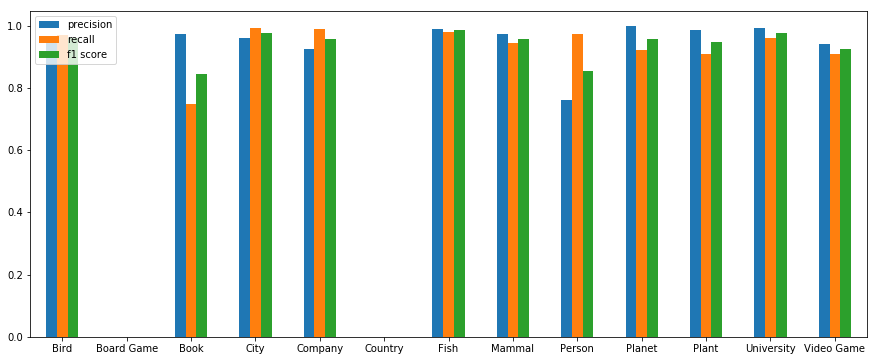

In [12]:
metrics = pd.DataFrame(np.c_[precision,recall,f1], index=classes)
metrics.columns = ['precision', 'recall', 'f1 score']
metrics.plot.bar(rot=0,figsize=(15, 6))
plt.show()